In [33]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, concatenate, Dense, Flatten, LSTM

import tensorflow as tf
import pickle

In [36]:
# Input Layers
price_input = Input(shape=(10,1), name='price_input')
env_input = Input(shape=(2,), name='env_input')

# Adjsustable Hidden Layers
price_layer = LSTM(32, activation='relu', name='price_layer1')(price_input)
for _ in range(1):
    price_layer = LSTM(32, activation='relu', name='price_layer2')(price_layer)
price_final = Flatten(name='price_flatten')(price_layer)

# Dropout
#if dropout:
#	price_final = Dropout(name='dropout')(price_final)

# Fixed layers
concat_layer = concatenate([price_final, env_input], name='concat_layer')
fixed_layer1 = Dense(8, activation='relu', name='fixed_layer1')(concat_layer)
fixed_layer2 = Dense(4, activation='relu', name='fixed_layer2')(fixed_layer1)

# Output Layer
action_output = Dense(1, activation='linear', name='action_output')(fixed_layer2)

model = Model(inputs=[price_input, env_input], outputs=[action_output])
model.compile(optimizer=opt, loss={'action_output':'mse'})

ValueError: Input 0 of layer price_layer2 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)

In [9]:
model.save('DQN_ANN/model/test_model')

INFO:tensorflow:Assets written to: DQN_ANN/model/test_model/assets


In [20]:
tes_model = tf.keras.models.load_model('DQN_ANN/model/1_8_0_Adam')

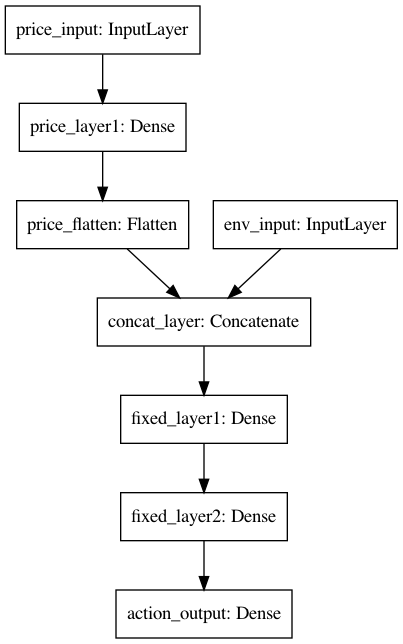

In [21]:
tf.keras.utils.plot_model(tes_model)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
fname = 'DQN_ANN/stats/1_8_0_Adam.pickle'
with open(fname, 'rb') as handle:
    ed0 = pickle.load(handle)

In [29]:
ed0

,price,opt,hidden_layer,bank,layer_size2,portfolio,layer_size1,episode,inv,ts,reward,action
0,0.88812,Adam,1,130.72664,0,200.00000,8,0,78,0,-0.00000,-78
1,0.88768,Adam,1,152.91864,0,199.96568,8,0,53,1,-0.01100,25
2,0.88785,Adam,1,192.87189,0,199.97469,8,0,8,2,-0.01215,45
3,0.88795,Adam,1,139.59489,0,199.97549,8,0,68,3,-0.00000,-60
4,0.88770,Adam,1,120.95319,0,199.95849,8,0,89,4,-0.00000,-21
...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.88899,Adam,1,111.14160,0,200.04060,8,0,100,109,-0.00000,-67
110,0.88896,Adam,1,152.03376,0,200.03760,8,0,54,110,0.00388,46
111,0.88894,Adam,1,131.58814,0,200.03652,8,0,77,111,-0.00000,-23
112,0.88884,Adam,1,152.92030,0,200.02882,8,0,53,112,-0.00360,24


In [26]:
a = [1,2,3]

b,c,d = a
b,c,d

(1, 2, 3)

In [27]:
b

1

In [30]:
import time

In [31]:
start_time = time.time()

print (time.time()-start_time)

0.0001049041748046875
